In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import pandas as pd

In [2]:
#data file
ds = xr.open_dataset('/Users/marki/Downloads/CERES_FluxByCldTyp-MON_Terra-Aqua-MODIS_Ed4.1_Subset_allsky_clearsky.nc')

In [3]:
#Cloud Froaction from 60N to 60S
cldarea_total_mon=ds['cldarea_total_mon'][ : ,30:150, :]
cldarea_total_mon

<xarray.DataArray 'cldarea_total_mon' (time: 234, lat: 120, lon: 360)>
[10108800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2021-12-15
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
Attributes:
    long_name:      Cloud Parameters: Cloud Area Fraction, Total clouds, Mont...
    standard_name:  Cloud Area Fraction - Total clouds
    units:          percent
    valid_min:             0
    valid_max:           100

In [4]:
#Cloud fraction in 1D np.ravel
cf=np.ravel(cldarea_total_mon)
cf

array([79.07597 , 79.07597 , 79.28124 , ..., 86.62028 , 90.134605,
       90.134605], dtype=float32)

In [5]:
#Cloud Fraction in actual fraction
c_f=cf/100
c_f

array([0.79075974, 0.79075974, 0.7928124 , ..., 0.8662028 , 0.901346  ,
       0.901346  ], dtype=float32)

In [6]:
# Shortwave (SW) energy leaving the Earth system
toa_sw_all_mon=ds['toa_sw_all_mon'][ : ,30:150, :]
toa_sw_all_mon

<xarray.DataArray 'toa_sw_all_mon' (time: 234, lat: 120, lon: 360)>
[10108800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2021-12-15
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
Attributes:
    long_name:      Observed Top of the Atmosphere Shortwave Flux, All-sky co...
    standard_name:  Observed TOA Shortwave Flux - All-sky
    units:          W m-2
    valid_min:             0
    valid_max:          1450

In [7]:
#SW leaving Earth in 1D np.ravel
sw_leave=np.ravel(toa_sw_all_mon)
sw_leave

array([23.31924 , 23.31924 , 22.907372, ..., 14.977612, 15.855193,
       15.855193], dtype=float32)

In [8]:
# Shortwave (SW) incoming from the sun
toa_solar_all_mon=ds['toa_solar_all_mon'][ : ,30:150, :]
toa_solar_all_mon

<xarray.DataArray 'toa_solar_all_mon' (time: 234, lat: 120, lon: 360)>
[10108800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2002-07-15 2002-08-15 ... 2021-12-15
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -59.5 -58.5 -57.5 -56.5 -55.5 ... 56.5 57.5 58.5 59.5
Attributes:
    long_name:      Observed Top of the Atmosphere Solar Insolation Flux, All...
    standard_name:  Observed TOA Solar Insolation Flux - All-sky
    units:          W m-2
    valid_min:             0
    valid_max:          1450

In [9]:
#SW Incoming from the Sun in 1D np.ravel
sw_income=np.ravel(toa_solar_all_mon)
sw_income

array([38.95842 , 38.95842 , 38.95277 , ..., 29.430557, 29.431767,
       29.431767], dtype=float32)

In [10]:
# Scene albedo is defined as the shortwave (SW) energy leaving the Earth system divided by the SW incoming from the sun
Scene_albedo= sw_leave/sw_income
Scene_albedo

array([0.5985674 , 0.5985674 , 0.5880807 , ..., 0.50891364, 0.53871024,
       0.53871024], dtype=float32)

In [11]:
##Test Origanl Value for C_F
c_f[5]

0.9350536

In [12]:
#Test Origanl Value for S_A
Scene_albedo[5]

0.600562

In [13]:
# Only non-NaN valuesare valid for both C_F and S_A  
valid = np.logical_and(~np.isnan(c_f),~np.isnan(Scene_albedo))

In [14]:
#Valid values for C_F and S_A
C_F=c_f[valid]
S_A=Scene_albedo[valid]

In [15]:
C_F.shape, S_A.shape

((10100786,), (10100786,))

In [16]:
S_A.shape

(10100786,)

In [18]:
#Checking adjusted position value for S_A
S_A[5]

0.600562

In [19]:
#Checking adjusted position value for C_F
C_F[5]

0.9350536

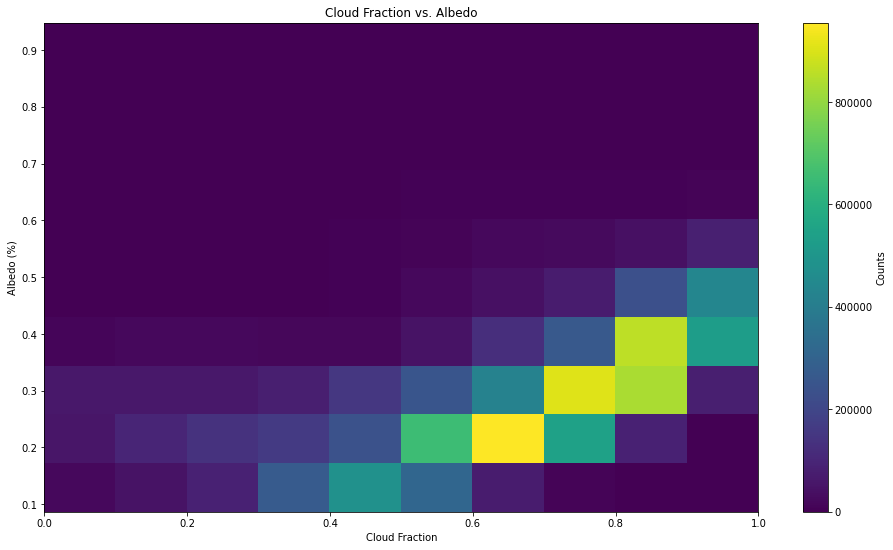

In [21]:
plt.figure(figsize=(16,9))
plt.hist2d(C_F, S_A)
plt.title('Cloud Fraction vs. Albedo')
plt.xlabel('Cloud Fraction')
plt.ylabel('Albedo (%)')
cbar=plt.colorbar()
cbar.set_label('Counts')